In [1]:
import cv2 as cv
import matplotlib.pyplot as plt



In [2]:
net = cv.dnn.readNetFromTensorflow("graph_opt.pb") ##weights

In [3]:
inWidth = 368
inHeight = 368
thr = 0.2

In [4]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [5]:
img = cv.imread("araki.png")

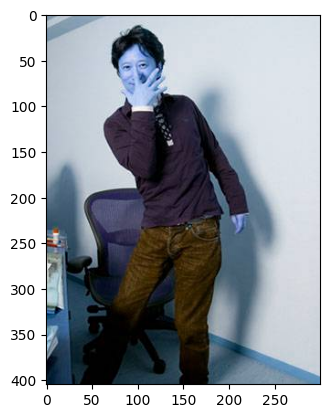

In [6]:
plt.imshow(img) ##BGR

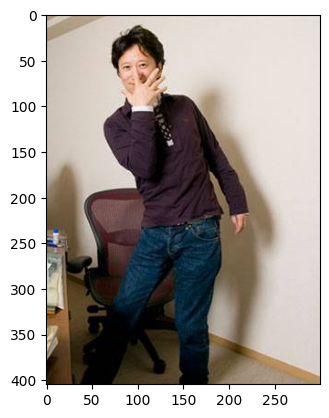

In [7]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [8]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        if conf > thr:
            x = (frameWidth * point[0]) / out.shape[3]
            y = (frameHeight * point[1]) / out.shape[2]
            points.append((int(x), int(y)))
        else:
            points.append(None)  # Append None if the body part is not detected
        
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] is not None and points[idTo] is not None:
            cv.line(frame, points[idFrom], points[idTo], (0,255,0), 3)
            cv.ellipse(frame, points[idFrom], (3,3), 0, 0, 360, (0, 0,255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3,3), 0, 0, 360, (0, 0,255), cv.FILLED)

            
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t/freq), (10,20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))
    return frame

In [9]:
estimated_img = pose_estimation(img)

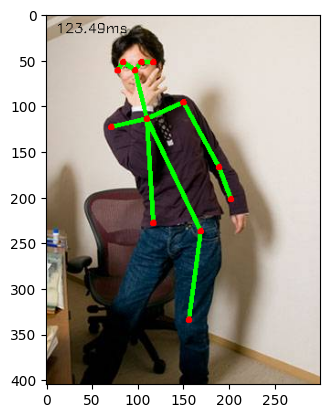

In [10]:
plt.imshow(cv.cvtColor(estimated_img, cv.COLOR_BGR2RGB))

In [11]:
boltimg = cv.imread("bolt.png")

In [12]:
estimated_bolt = pose_estimation(boltimg)

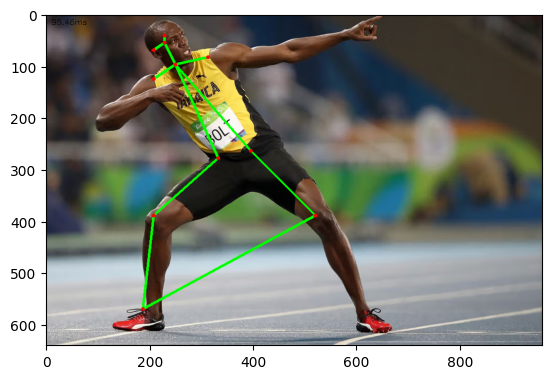

In [13]:
plt.imshow(cv.cvtColor(estimated_bolt, cv.COLOR_BGR2RGB))

In [14]:
fleximg = cv.imread("flexing.png")

In [15]:
estimated_flex = pose_estimation(fleximg)

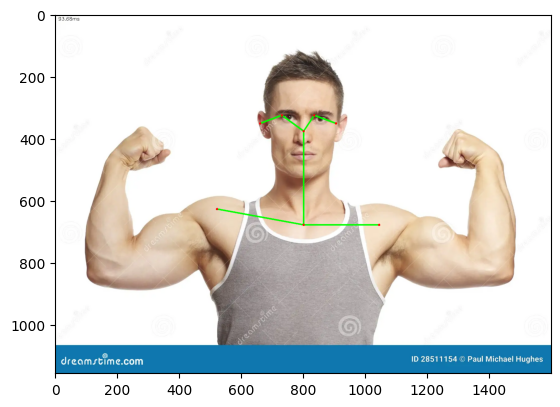

In [16]:
plt.imshow(cv.cvtColor(estimated_flex, cv.COLOR_BGR2RGB))

In [17]:
walkimg = cv.imread("walking.png")

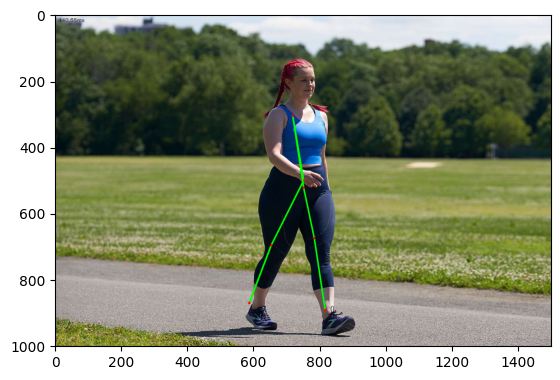

In [18]:
estimated_walk = pose_estimation(walkimg)
plt.imshow(cv.cvtColor(estimated_walk, cv.COLOR_BGR2RGB))

In [20]:
#import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np
from io import BytesIO

In [24]:
cap = cv.VideoCapture(0)

cap.set(3,640) # adjust width
cap.set(4,480) # adjust height

while True:
    success, img2 = cap.read()
    if success:
        
        estimated_pose = pose_estimation(img2)
        cv.imshow("Webcam", estimated_pose) # This will open an independent window

        if cv.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
            cap.release()
            break
            
cv.destroyAllWindows() 
cv.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window d

-1

In [22]:
cap.release()